In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x,y = make_classification(n_samples = 300, n_features = 2, n_informative = 2, n_redundant= 0,
                          n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state = 42)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
accuracy_score(ypred, ytest)

0.9444444444444444

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
accuracy_score(ypred, ytest)

0.9444444444444444

In [ ]:
def plot_decision_boundary_with_probs(model, x, y, ax, title, acc):
  xmin, xmax = x[:,0].min() -1, x[:, 0].max()+1
  ymin, ymax = x[:,1].min() -1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))
  print(xx.shape)
  print(yy.shape)

  #Predict probability for class 1
  z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  z = z.reshape(xx.shape)

  #Probability heatmap
  contour = ax.contourf(xx, yy, z, alpha = 0.3, cmap = plt.cm.coolwarm)
  plt.colorbar(contour, ax = ax)

  #Decision Boundary
  boundary = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contour(xx,yy, boundary, colors = "k", linewidths = 1)

  #Data points
  ax.scatter(x[:,0], x[:,1],c = y, edgecolor = "k", cmap = plt.cm.coolwarm)
  ax.set_title(f"{title}\nAccuracy: {acc:.2f}")

In [ ]:
ypred_gnb = nb.predict(xtest)
ypred_lr = nb.predict(xtest)
acc_gnb = accuracy_score(ytest, ypred_gnb)
acc_lr = accuracy_score(ytest, ypred_lr)

(200, 200)
(200, 200)
(200, 200)
(200, 200)


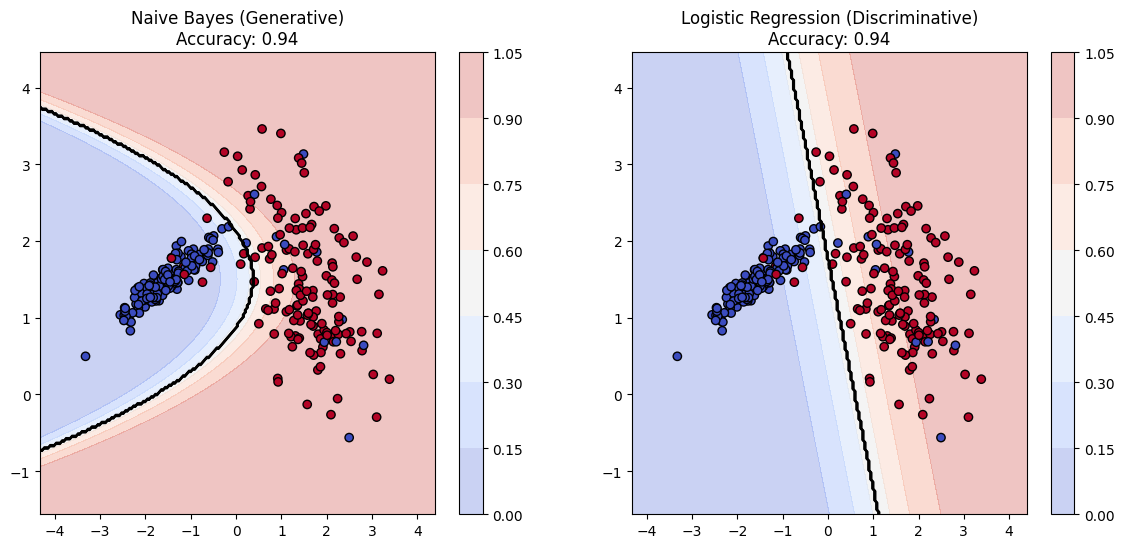

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (14,6))
plot_decision_boundary_with_probs(nb, x,y, axs[0], "Naive Bayes (Generative)", acc_gnb)
plot_decision_boundary_with_probs(lr, x,y, axs[1], "Logistic Regression (Discriminative)", acc_lr)
plt.show()

In [ ]:
print(f"Naive Bayes Acccuracy: {acc_gnb:.4f}")
print(f"Logistic Regression Acccuracy: {acc_lr:.4f}")

Naive Bayes Acccuracy: 0.9444
Logistic Regression Acccuracy: 0.9444
